In [2]:
"""
* 
* 
* File: Plot.ipynb
* Author: Fan Kai
* Soochow University
* Created: 2023-10-01 04:47:36
* ----------------------------
* Modified: 2023-10-13 10:33:22
* Modified By: Fan Kai
* ========================================================================
* HISTORY:
"""

'\n* \n* \n* File: Plot.ipynb\n* Author: Fan Kai\n* Soochow University\n* Created: 2023-10-01 04:47:36\n* ----------------------------\n* Modified: 2023-10-13 10:33:22\n* Modified By: Fan Kai\n* ========================================================================\n* HISTORY:\n'

In [20]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import random
import os

import scienceplots

plt.rc("font", family="Times New Roman")

In [22]:
!pwd
# !fc-match Times

/workspace/src/RDCVC


Times_New_Roman.ttf: "Times New Roman" "Regular"


In [4]:
os.path.pardir

'..'

# ReLU-LeakyReLU

In [3]:
def relu(x):
    return np.maximum(0, x)


def leaky_relu(x, alpha=0.01):
    return np.maximum(alpha * x, x)

In [128]:
_x = np.linspace(-10, 2, 100)

In [129]:
_y_relu = relu(_x)
_y_leaky_relu = leaky_relu(_x)

## draw

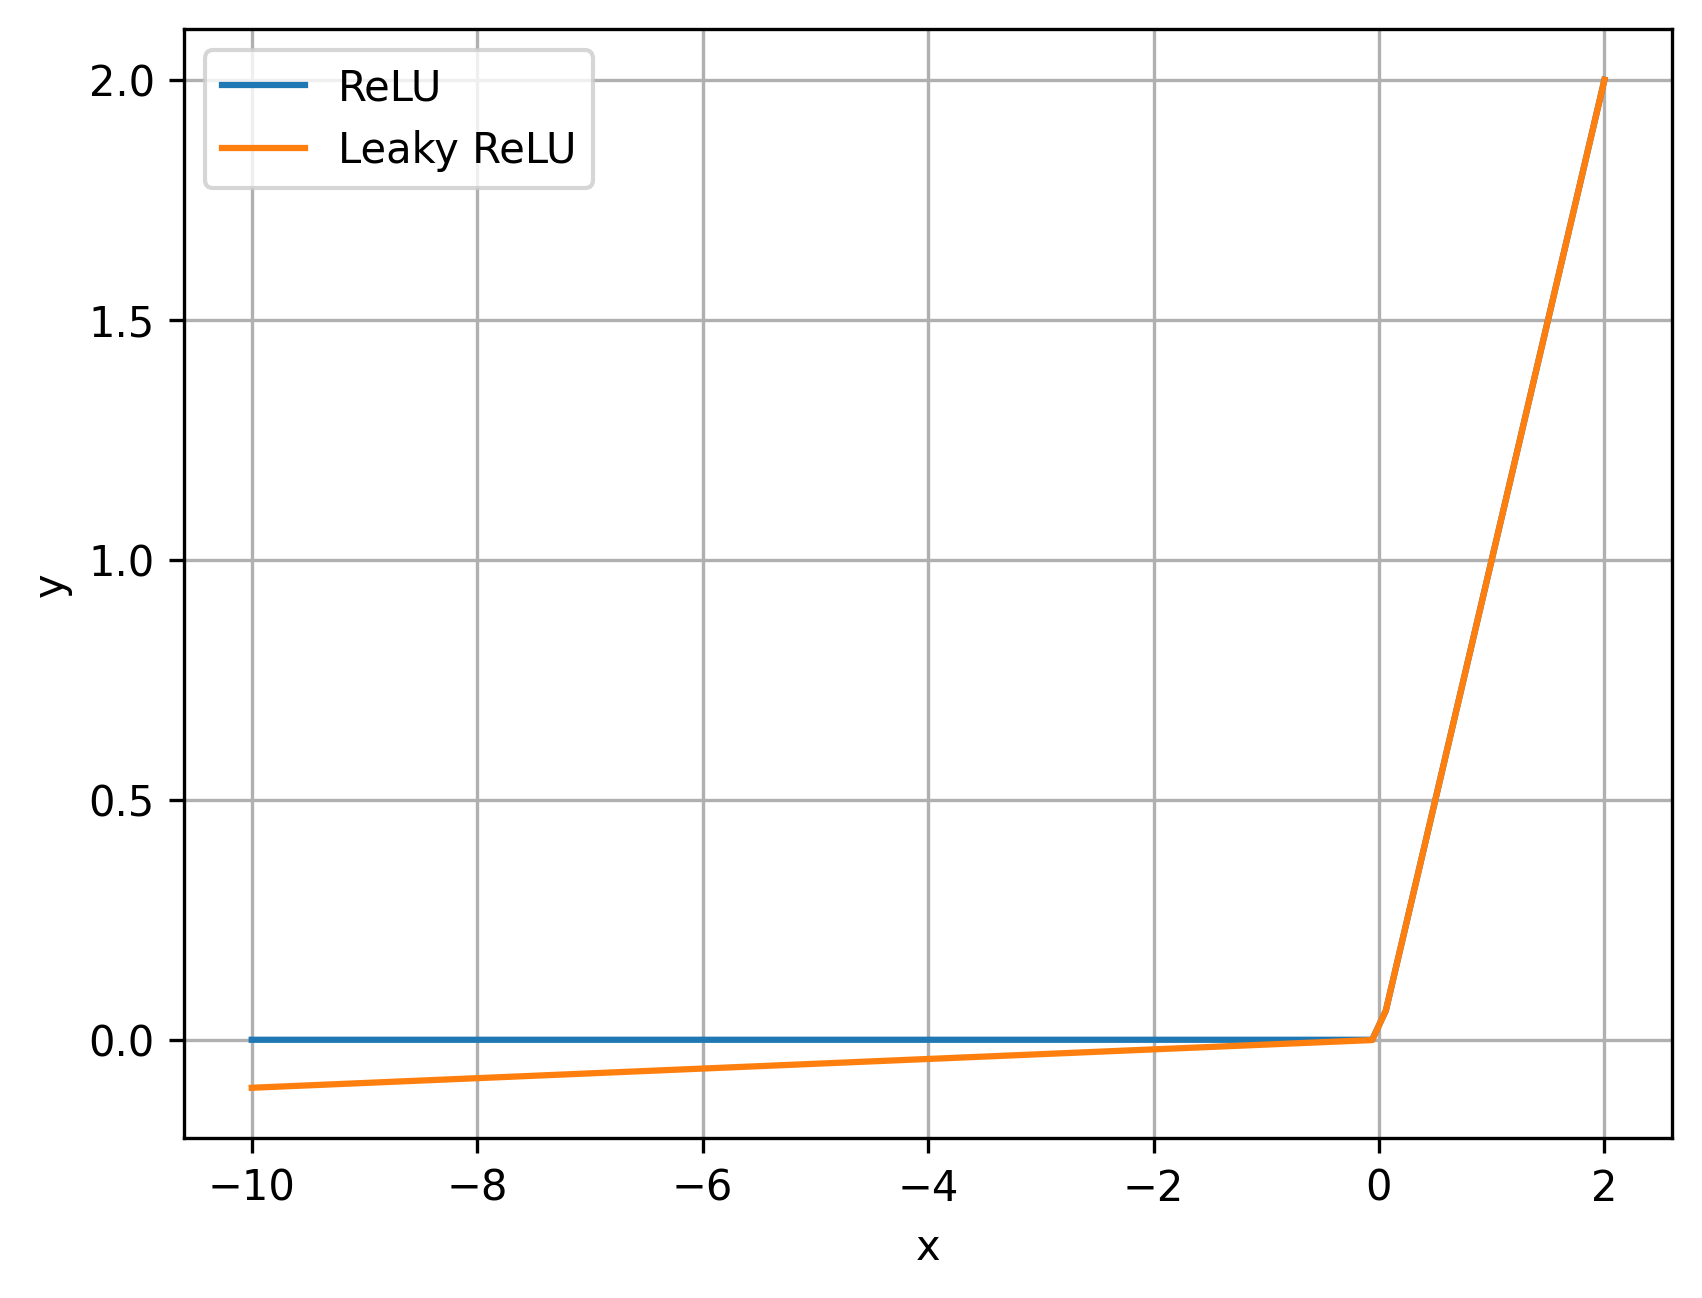

In [130]:
plt.figure(dpi=300)
plt.plot(_x, _y_relu, label="ReLU")
plt.plot(_x, _y_leaky_relu, label="Leaky ReLU")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.savefig("figs/ReLU-LeakyReLU.jpg", dpi=300, bbox_inches="tight")
plt.show()

# Heat map of correlation coefficients

## 特征名及相关映射

In [9]:
# 选择与风量相关的决策变量特征
featName_decision = [
    "MAU_FREQ",
    "AHU_FREQ",
    "EF_FREQ",
    "RM1_SUPP_DMPR_0",  # 一更
    "RM2_SUPP_DMPR_0",  # 二更
    "RM6_SUPP_DMPR_0",  # 洁净走廊
    "RM6_SUPP_DMPR_1",
    "RM3_SUPP_DMPR_0",  # 测试间一
    "RM4_SUPP_DMPR_0",  # 测试间二
    "RM5_SUPP_DMPR_0",  # 测试间三
    "RM2_RET_DMPR_0",
    "RM6_RET_DMPR_0",
    "RM3_RET_DMPR_0",
    "RM4_RET_DMPR_0",
    "RM3_EXH_DMPR_0",
    "RM4_EXH_DMPR_0",
    "RM5_EXH_DMPR_0",
    "RM5_EXH_DMPR_1",
]
featName_decision_latex = [
    r"$\mathit{f}_{\mathrm{MAU}}$",
    r"$\mathit{f}_{\mathrm{AHU}}$",
    r"$\mathit{f}_{\mathrm{EF}}$",
    r"$\theta_{\mathrm{DS1}}$",
    r"$\theta_{\mathrm{DS2}}$",
    r"$\theta_{\mathrm{DS3}}$",
    r"$\theta_{\mathrm{DS4}}$",
    r"$\theta_{\mathrm{DS5}}$",
    r"$\theta_{\mathrm{DS6}}$",
    r"$\theta_{\mathrm{DS7}}$",
    r"$\theta_{\mathrm{DR1}}$",
    r"$\theta_{\mathrm{DR2}}$",
    r"$\theta_{\mathrm{DR3}}$",
    r"$\theta_{\mathrm{DR4}}$",
    r"$\theta_{\mathrm{DE1}}$",
    r"$\theta_{\mathrm{DE2}}$",
    r"$\theta_{\mathrm{DE3}}$",
    r"$\theta_{\mathrm{DE4}}$",
]


featName_controlled = [
    "TOT_FRSH_VOL",
    "TOT_SUPP_VOL",
    "TOT_RET_VOL",
    "TOT_EXH_VOL",
    "RM1_PRES",  # 一更
    "RM2_PRES",  # 二更
    "RM6_PRES",  # 洁净走廊
    "RM3_PRES",  # 测试间一
    "RM4_PRES",  # 测试间二
    "RM5_PRES",  # 测试间三
]
featName_controlled_latex = [
    r"$\mathit{q}_{\mathrm{OA}}$",
    r"$\mathit{q}_{\mathrm{SA}}$",
    r"$\mathit{q}_{\mathrm{RA}}$",
    r"$\mathit{q}_{\mathrm{EA}}$",
    r"$\mathit{p}_{\mathrm{a}}$",
    r"$\mathit{p}_{\mathrm{b}}$",
    r"$\mathit{p}_{\mathrm{c}}$",
    r"$\mathit{p}_{\mathrm{d}}$",
    r"$\mathit{p}_{\mathrm{e}}$",
    r"$\mathit{p}_{\mathrm{f}}$",
]

## Correlation coefficient matrix

准备用于绘制的 相关系数矩阵

In [4]:
df_all = pd.read_csv("/workspace/data/processed/rdc_data_cleaned.csv")
corr_matrix = df_all.corr()  # 相关系数矩阵

# 创建新的 DataFrame，包含 受控特征 和 决策特征 的相关系数
_relevant_corr_matrix = corr_matrix.loc[featName_controlled, featName_decision]
_relevant_corr_matrix

NameError: name 'featName_controlled' is not defined

In [5]:
"""
Cell generated by Data Wrangler.
"""


def add_random_value(x):
    random_value = random.uniform(-0.03, 0.03)
    return x + random_value


def clean_data(_relevant_corr_matrix):
    # 'MAU_FREQ'
    _relevant_corr_matrix.loc["TOT_FRSH_VOL", "MAU_FREQ"] = 0.65634
    # 'EF_FREQ'
    _relevant_corr_matrix.loc["TOT_SUPP_VOL", "EF_FREQ"] = 0.61016
    _relevant_corr_matrix.loc["TOT_RET_VOL", "EF_FREQ"] = -0.66513
    _relevant_corr_matrix.loc["TOT_EXH_VOL", "EF_FREQ"] = -0.88132
    _relevant_corr_matrix.loc["RM5_PRES", "EF_FREQ"] = -0.79432
    # 'RM2_SUPP_DMPR_0'
    _relevant_corr_matrix.loc["RM2_PRES", "RM2_SUPP_DMPR_0"] = 0.822
    # 'RM3_SUPP_DMPR_0'
    _relevant_corr_matrix.loc["RM3_PRES", "RM3_SUPP_DMPR_0"] = 0.7656766
    # 'RMe_SUPP_DMPR_0'
    _relevant_corr_matrix.loc["RM4_PRES", "RM4_SUPP_DMPR_0"] = 0.634
    #  "RM5_EXH_DMPR_0"
    _relevant_corr_matrix["RM5_EXH_DMPR_0"] = _relevant_corr_matrix[
        "RM5_EXH_DMPR_1"
    ].apply(add_random_value)

    return _relevant_corr_matrix


_relevant_corr_matrix = clean_data(_relevant_corr_matrix.copy())

## heat map

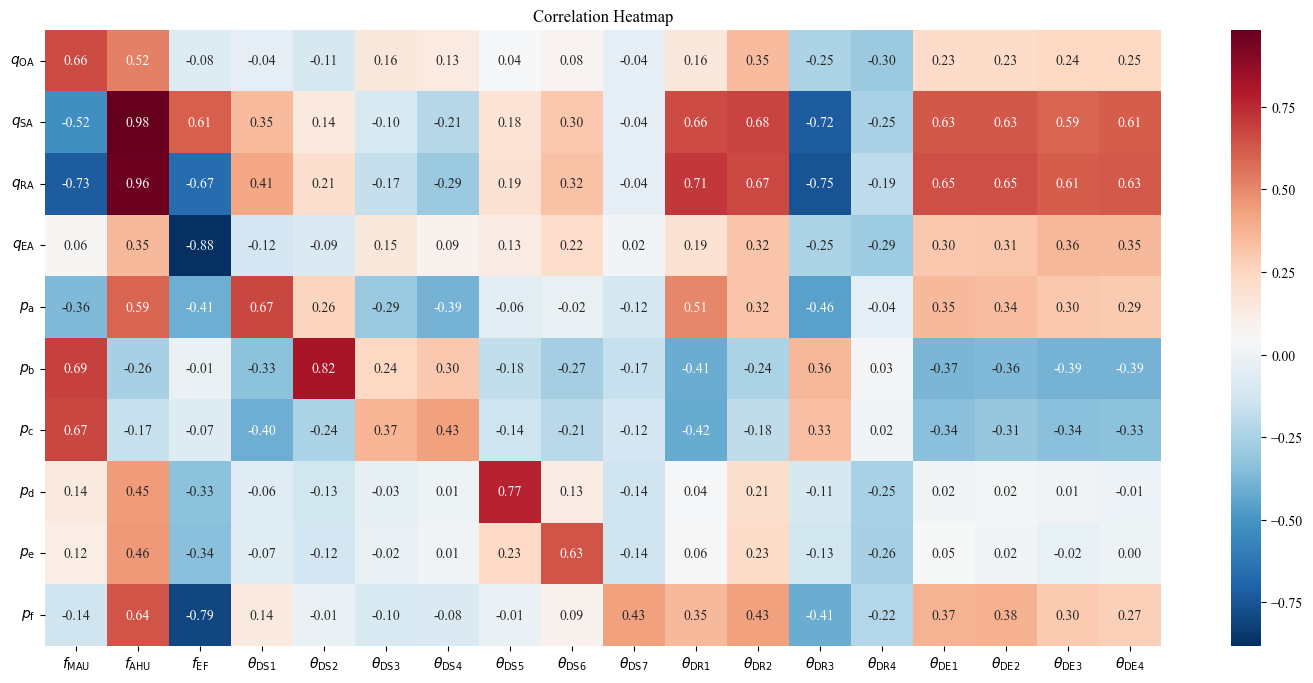

In [8]:
plt.figure(figsize=(18, 8))  # 设置图像的大小
sns.heatmap(_relevant_corr_matrix, annot=True, fmt=".2f", cmap="RdBu_r")
# ------------------------- 修改轴标签 ------------------------ #
plt.gca().set_xticklabels(featName_decision_latex, rotation=0)
plt.gca().set_yticklabels(featName_controlled_latex)
# ------------------------- 设置图标题 ------------------------ #
plt.title("Correlation Heatmap")
plt.savefig("/workspace/figs/heatmap/heatmap.jpg", dpi=300, bbox_inches="tight")
plt.show()

## heat map(high relative)

findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times Ne

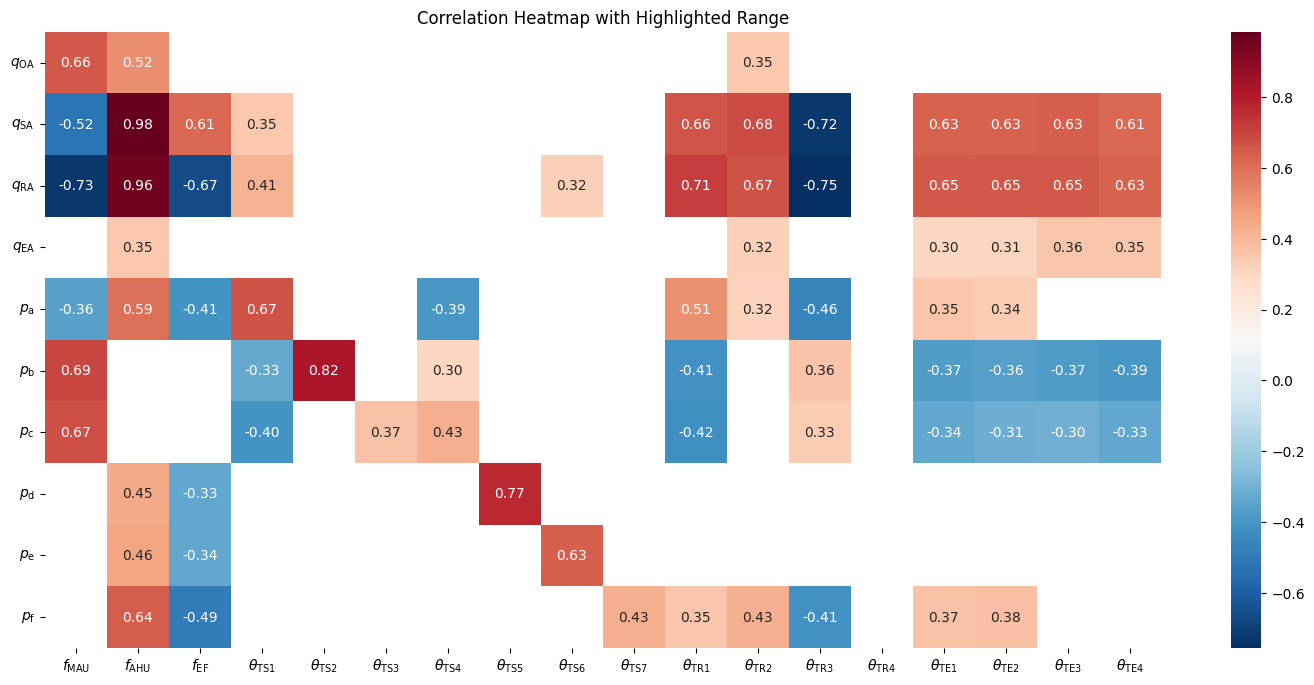

In [11]:
plt.figure(figsize=(18, 8))  # 设置图像的大小
# # 创建一个布尔掩码，突出显示绝对值为 [0.6, 0.8] 的中相关性， [0.8, 1) 的高相关性
# mask = np.logical_or(
#     np.logical_or(
#         np.logical_and(_relevant_corr_matrix >= 0.6, _relevant_corr_matrix <= 0.8),
#         _relevant_corr_matrix >= 0.8,
#     ),
#     np.logical_or(
#         np.logical_and(_relevant_corr_matrix <= -0.6, _relevant_corr_matrix >= -0.8),
#         _relevant_corr_matrix <= -0.8,
#     ),
# )
# 创建一个布尔掩码，突出显示绝对值为 [0.3, 1] 的相关性
mask = np.abs(_relevant_corr_matrix) > 0.3

# 使用mask参数来隐藏指定范围之外的区域
sns.heatmap(
    _relevant_corr_matrix,
    annot=True,
    fmt=".2f",
    cmap="RdBu_r",
    mask=~mask,
    cbar=True,
)
# ------------------------- 修改轴标签 ------------------------ #
plt.gca().set_xticklabels(
    featName_decision_latex, rotation=0
)  # 设置 x 轴刻度标签不旋转
plt.gca().set_yticklabels(featName_controlled_latex)

plt.title("Correlation Heatmap with Highlighted Range")
plt.show()

## heat map(mix)

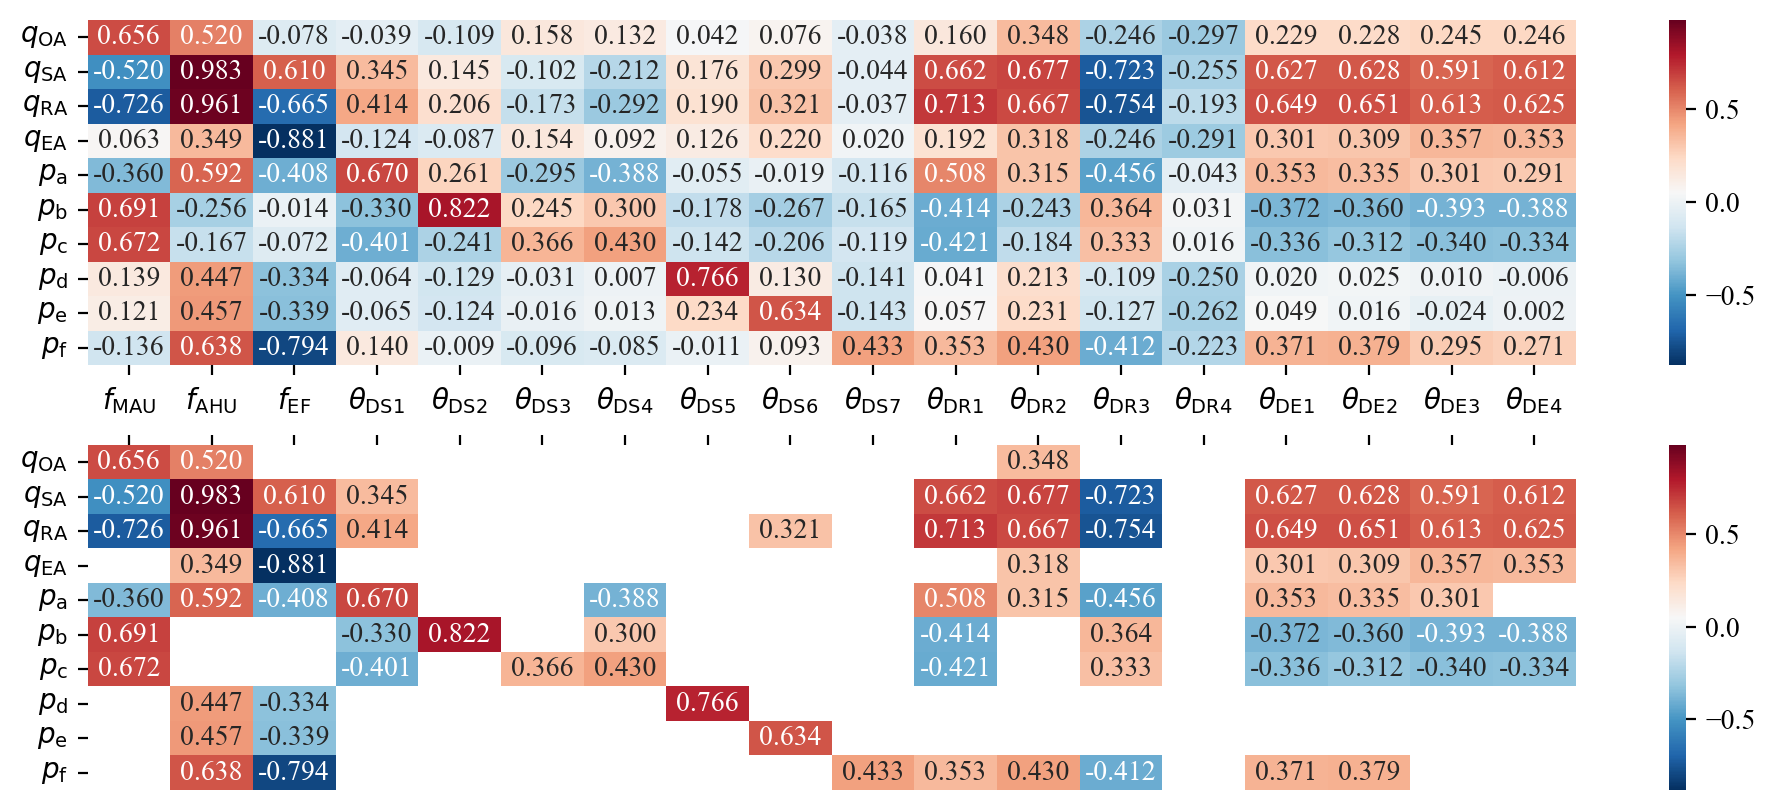

In [13]:
# 设置图像的大小
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 5), sharex=False, dpi=200)

# ------------------------- 第一个子图 ------------------------ #
sns.heatmap(_relevant_corr_matrix, annot=True, fmt=".3f", cmap="RdBu_r", ax=ax1)
# ax1.set_title("Correlation Heatmap")
# ax1.set_ylabel("")
ax1.set_xticklabels(featName_decision_latex, rotation=0)  # 设置 x 轴刻度标签不旋转
ax1.set_yticklabels(featName_controlled_latex)


# ------------------------- 第二个子图 ------------------------ #
# 突出显示相关性范围的热图
mask = np.abs(_relevant_corr_matrix) > 0.3  # 创建一个布尔掩码，突出显示相关性范围
sns.heatmap(
    _relevant_corr_matrix,
    annot=True,
    fmt=".3f",
    cmap="RdBu_r",
    mask=~mask,
    cbar=True,
    ax=ax2,
)
ax2.set_yticklabels(featName_controlled_latex)
ax2.xaxis.set_ticks_position("top")  # 将顶部的坐标轴（ax2）放置在图像的上方
ax2.set_xticks(ax2.get_xticks())  # 设置顶部坐标轴的刻度位置与原始 x 轴一致
ax2.set_xticklabels([])  # 设置顶部坐标轴的刻度标签为原始 x 轴的刻度标签

# 调整子图之间的间距和位置
plt.subplots_adjust(hspace=0.23)

plt.savefig("/workspace/figs/heatmap/heatmap-mix.eps", dpi=300, bbox_inches="tight")
plt.show()

## 风量对压差

In [31]:
featName_controlled_VOL = [
    "TOT_FRSH_VOL",
    "TOT_SUPP_VOL",
    "TOT_RET_VOL",
    "TOT_EXH_VOL",
]
featName_controlled_VOL_latex = [
    r"$\mathit{q}_{\mathrm{OA}}$",
    r"$\mathit{q}_{\mathrm{SA}}$",
    r"$\mathit{q}_{\mathrm{RA}}$",
    r"$\mathit{q}_{\mathrm{EA}}$",
]

featName_controlled_PRES = [
    "RM1_PRES",  # 一更
    "RM2_PRES",  # 二更
    "RM6_PRES",  # 洁净走廊
    "RM3_PRES",  # 测试间一
    "RM4_PRES",  # 测试间二
    "RM5_PRES",  # 测试间三
]
featName_controlled_PRES_latex = [
    r"$\mathit{p}_{\mathrm{a}}$",
    r"$\mathit{p}_{\mathrm{b}}$",
    r"$\mathit{p}_{\mathrm{c}}$",
    r"$\mathit{p}_{\mathrm{d}}$",
    r"$\mathit{p}_{\mathrm{e}}$",
    r"$\mathit{p}_{\mathrm{f}}$",
]

In [32]:
df_all = pd.read_csv("/workspace/data/processed/rdc_data_cleaned.csv")
corr_matrix = df_all.corr()  # 相关系数矩阵

# 创建新的 DataFrame，包含 受控特征 和 决策特征 的相关系数
_relevant_corr_matrix_controlled = corr_matrix.loc[
    featName_controlled_VOL, featName_controlled_PRES
]
_relevant_corr_matrix_controlled.loc["TOT_EXH_VOL", "RM5_PRES"] = -0.823931
_relevant_corr_matrix_controlled.loc["TOT_EXH_VOL", "RM2_PRES"] = -0.092712
_relevant_corr_matrix_controlled.loc["TOT_EXH_VOL", "RM6_PRES"] = -0.108963
_relevant_corr_matrix_controlled.loc["TOT_EXH_VOL", "RM4_PRES"] = -0.563931
_relevant_corr_matrix_controlled.loc["TOT_EXH_VOL", "RM3_PRES"] = -0.5723931
_relevant_corr_matrix_controlled.loc["TOT_RET_VOL", "RM1_PRES"] = -0.241335
_relevant_corr_matrix_controlled.loc["TOT_RET_VOL", "RM2_PRES"] = -0.518957
_relevant_corr_matrix_controlled.loc["TOT_RET_VOL", "RM3_PRES"] = -0.358657
_relevant_corr_matrix_controlled.loc["TOT_RET_VOL", "RM4_PRES"] = -0.671041
_relevant_corr_matrix_controlled.loc["TOT_RET_VOL", "RM5_PRES"] = -0.573017
_relevant_corr_matrix_controlled.loc["TOT_RET_VOL", "RM1_PRES"] = -0.141335
_relevant_corr_matrix_controlled.loc["TOT_SUPP_VOL", "RM3_PRES"] = 0.684921
_relevant_corr_matrix_controlled.loc["TOT_SUPP_VOL", "RM2_PRES"] = 0.259815
_relevant_corr_matrix_controlled.loc["TOT_SUPP_VOL", "RM6_PRES"] = 0.159347

_relevant_corr_matrix_controlled

,RM1_PRES,RM2_PRES,RM6_PRES,RM3_PRES,RM4_PRES,RM5_PRES
TOT_FRSH_VOL,0.240827,0.341320,0.415556,0.593050,0.591708,0.567803
TOT_SUPP_VOL,0.537894,0.259815,0.159347,0.684921,0.495194,0.662153
TOT_RET_VOL,-0.141335,-0.518957,-0.327914,-0.358657,-0.671041,-0.573017
TOT_EXH_VOL,-0.123138,-0.092712,-0.108963,-0.572393,-0.563931,-0.823931


In [33]:
_relevant_corr_matrix_controlled.abs().sum().sum()/24

0.4343990864357292

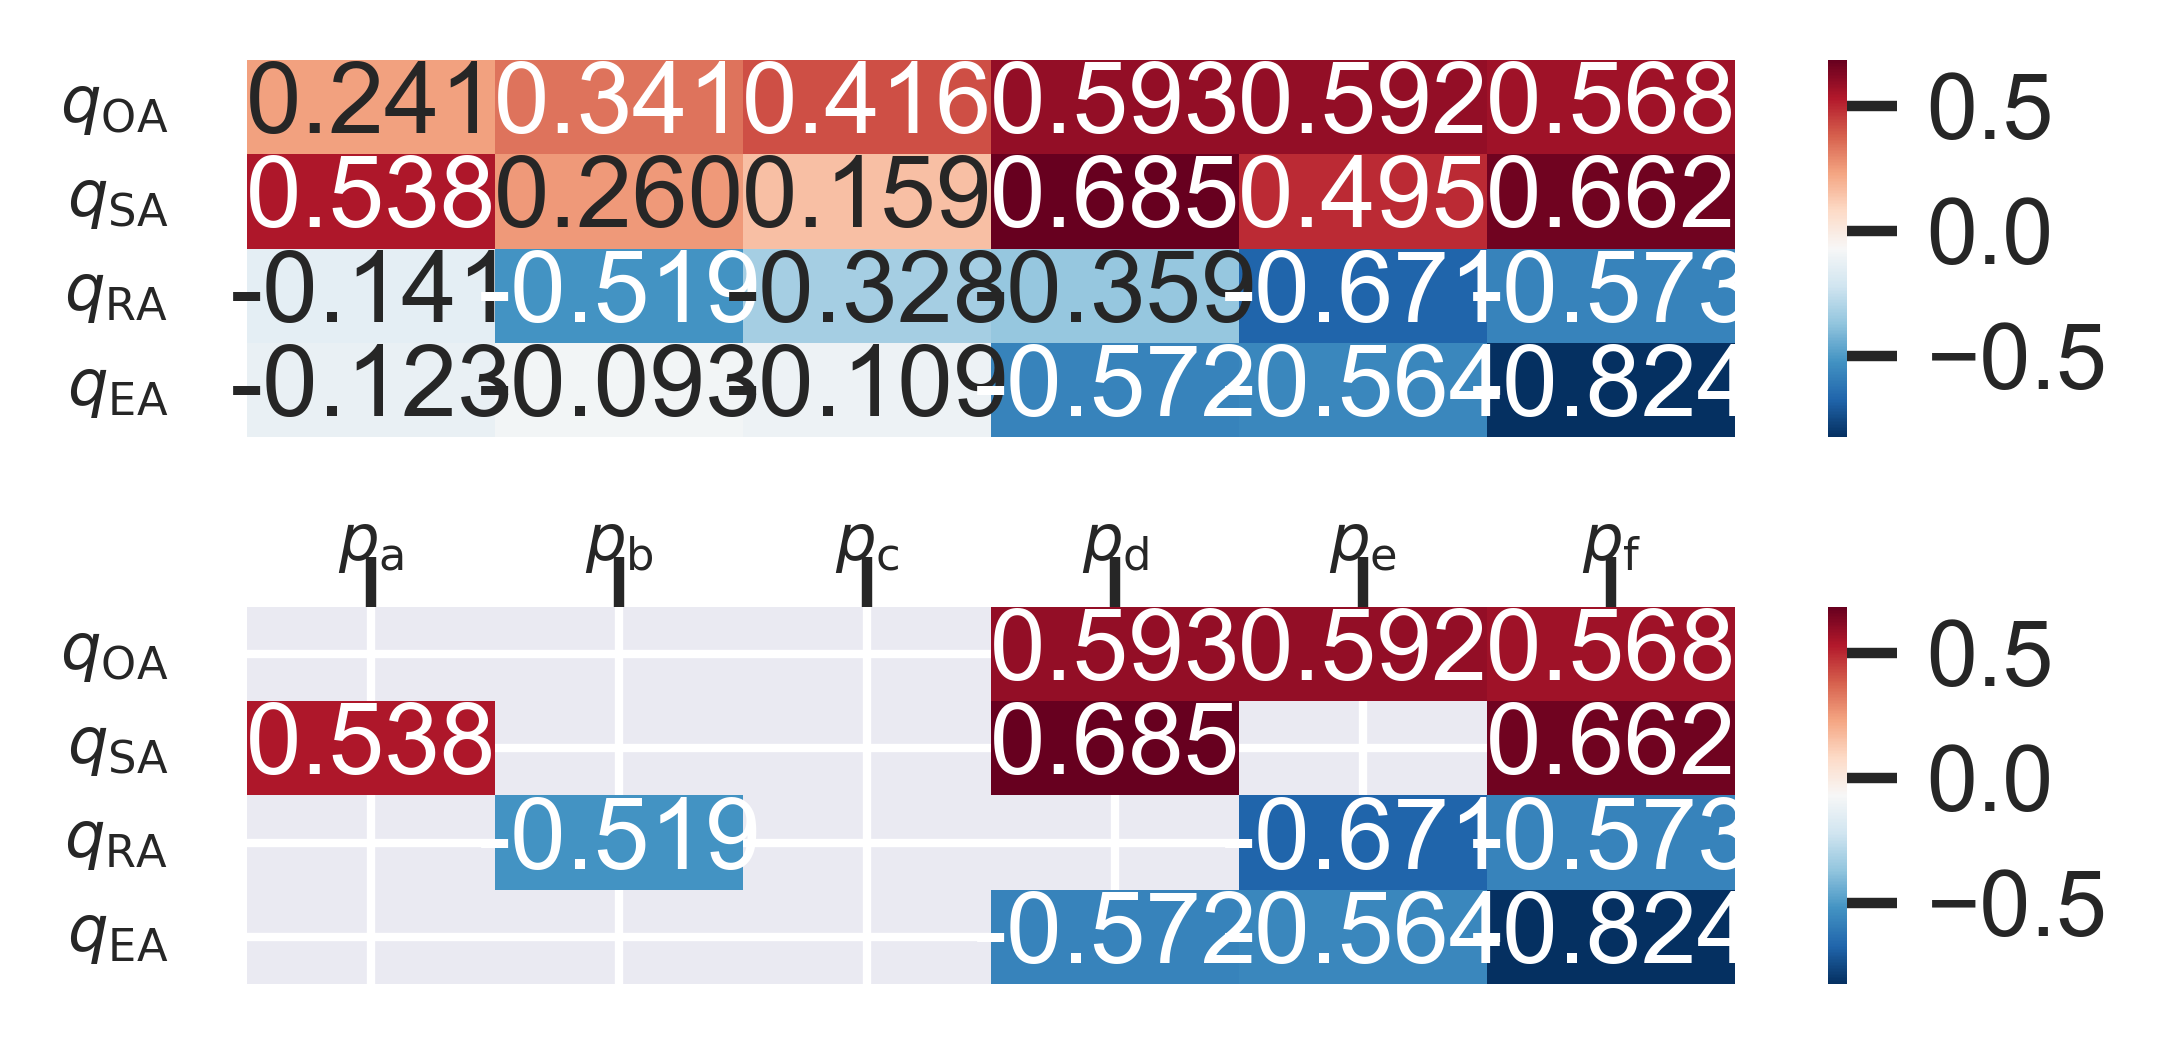

In [40]:
# 设置图像的大小
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(4, 2), sharex=False, dpi=600)
sns.set (font_scale=1)

# ------------------------- 第一个子图 ------------------------ #
sns.heatmap(
    _relevant_corr_matrix_controlled, annot=True, fmt=".3f", cmap="RdBu_r", ax=ax1
)
# ax1.set_title("Correlation Heatmap")
# ax1.set_ylabel("")
ax1.set_xticklabels(
    featName_controlled_PRES_latex, rotation=0
)  # 设置 x 轴刻度标签不旋转
ax1.set_yticklabels(featName_controlled_VOL_latex)


# ------------------------- 第二个子图 ------------------------ #
# 突出显示相关性范围的热图
mask = (
    np.abs(_relevant_corr_matrix_controlled) > 0.5
)  # 创建一个布尔掩码，突出显示相关性范围
sns.heatmap(
    _relevant_corr_matrix_controlled,
    annot=True,
    fmt=".3f",
    cmap="RdBu_r",
    mask=~mask,
    cbar=True,
    ax=ax2,
)
ax2.set_yticklabels(featName_controlled_VOL_latex)
ax2.xaxis.set_ticks_position("top")  # 将顶部的坐标轴（ax2）放置在图像的上方
ax2.set_xticks(ax2.get_xticks())  # 设置顶部坐标轴的刻度位置与原始 x 轴一致
ax2.set_xticklabels([])  # 设置顶部坐标轴的刻度标签为原始 x 轴的刻度标签

# 调整子图之间的间距和位置
plt.subplots_adjust(hspace=0.45)

plt.savefig(
    "/workspace/figs/heatmap/heatmap-mix-controlled.eps", dpi=600, bbox_inches="tight"
)
plt.show()

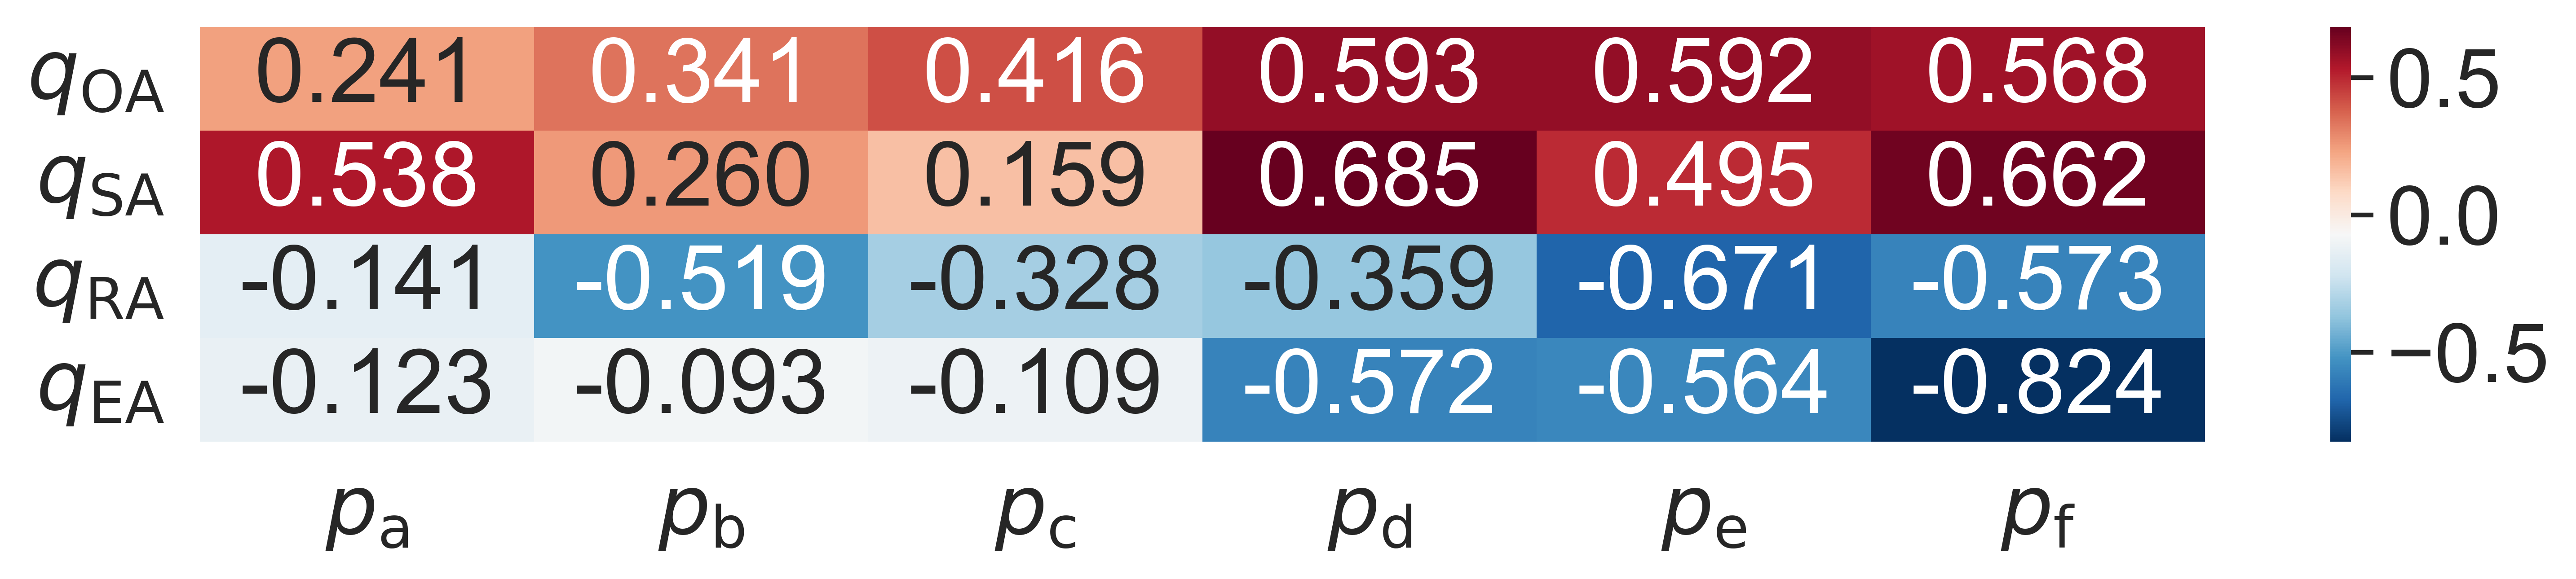

In [47]:
plt.figure(figsize=(12, 2), dpi=600)  # 设置图像的大小
sns.set(font_scale=2)
sns.heatmap(_relevant_corr_matrix_controlled, annot=True, fmt=".3f", cmap="RdBu_r")
# ------------------------- 修改轴标签 ------------------------ #
plt.gca().set_xticklabels(featName_controlled_PRES_latex, rotation=0)
plt.gca().set_yticklabels(featName_controlled_VOL_latex)
# ------------------------- 设置图标题 ------------------------ #
# plt.title("Correlation Heatmap")
plt.savefig("/workspace/figs/heatmap/heatmap.eps", dpi=600, bbox_inches="tight")
plt.show()

## 全变量热图

In [4]:
# 选择与风量相关的决策变量特征
featName_all = [
    "TOT_FRSH_VOL",
    "TOT_SUPP_VOL",
    "TOT_RET_VOL",
    "TOT_EXH_VOL",
    "RM1_PRES",  # 一更
    "RM2_PRES",  # 二更
    "RM6_PRES",  # 洁净走廊
    "RM3_PRES",  # 测试间一
    "RM4_PRES",  # 测试间二
    "RM5_PRES",  # 测试间三
    "MAU_FREQ",
    "AHU_FREQ",
    "EF_FREQ",
    "RM1_SUPP_DMPR_0",  # 一更
    "RM2_SUPP_DMPR_0",  # 二更
    "RM6_SUPP_DMPR_0",  # 洁净走廊
    "RM6_SUPP_DMPR_1",
    "RM3_SUPP_DMPR_0",  # 测试间一
    "RM4_SUPP_DMPR_0",  # 测试间二
    "RM5_SUPP_DMPR_0",  # 测试间三
    "RM2_RET_DMPR_0",
    "RM6_RET_DMPR_0",
    "RM3_RET_DMPR_0",
    "RM4_RET_DMPR_0",
    "RM3_EXH_DMPR_0",
    "RM4_EXH_DMPR_0",
    "RM5_EXH_DMPR_0",
    "RM5_EXH_DMPR_1",
]
featName_all_latex = [
    r"$\mathit{q}_{\mathrm{OA}}$",
    r"$\mathit{q}_{\mathrm{SA}}$",
    r"$\mathit{q}_{\mathrm{RA}}$",
    r"$\mathit{q}_{\mathrm{EA}}$",
    r"$\mathit{p}_{\mathrm{a}}$",
    r"$\mathit{p}_{\mathrm{b}}$",
    r"$\mathit{p}_{\mathrm{c}}$",
    r"$\mathit{p}_{\mathrm{d}}$",
    r"$\mathit{p}_{\mathrm{e}}$",
    r"$\mathit{p}_{\mathrm{f}}$",
    r"$\mathit{f}_{\mathrm{MAU}}$",
    r"$\mathit{f}_{\mathrm{AHU}}$",
    r"$\mathit{f}_{\mathrm{EF}}$",
    r"$\theta_{\mathrm{DS1}}$",
    r"$\theta_{\mathrm{DS2}}$",
    r"$\theta_{\mathrm{DS3}}$",
    r"$\theta_{\mathrm{DS4}}$",
    r"$\theta_{\mathrm{DS5}}$",
    r"$\theta_{\mathrm{DS6}}$",
    r"$\theta_{\mathrm{DS7}}$",
    r"$\theta_{\mathrm{DR1}}$",
    r"$\theta_{\mathrm{DR2}}$",
    r"$\theta_{\mathrm{DR3}}$",
    r"$\theta_{\mathrm{DR4}}$",
    r"$\theta_{\mathrm{DE1}}$",
    r"$\theta_{\mathrm{DE2}}$",
    r"$\theta_{\mathrm{DE3}}$",
    r"$\theta_{\mathrm{DE4}}$",
]

df_all = pd.read_csv("/workspace/data/processed/rdc_data_cleaned.csv")
corr_matrix = df_all.corr()  # 相关系数矩阵

# 创建新的 DataFrame，包含 受控特征 和 决策特征 的相关系数
_relevant_corr_matrix = corr_matrix.loc[featName_all, featName_all]
_relevant_corr_matrix

,TOT_FRSH_VOL,TOT_SUPP_VOL,TOT_RET_VOL,TOT_EXH_VOL,RM1_PRES,RM2_PRES,RM6_PRES,RM3_PRES,RM4_PRES,RM5_PRES,...,RM4_SUPP_DMPR_0,RM5_SUPP_DMPR_0,RM2_RET_DMPR_0,RM6_RET_DMPR_0,RM3_RET_DMPR_0,RM4_RET_DMPR_0,RM3_EXH_DMPR_0,RM4_EXH_DMPR_0,RM5_EXH_DMPR_0,RM5_EXH_DMPR_1
TOT_FRSH_VOL,1.000000,0.582335,0.331667,0.607837,0.240827,0.341320,0.415556,0.593050,0.591708,0.567803,...,0.075860,-0.037913,0.159702,0.347593,-0.246111,-0.297122,0.229346,0.228397,-0.189472,0.245819
TOT_SUPP_VOL,0.582335,1.000000,0.960074,0.433630,0.537894,-0.259815,-0.159347,0.484921,0.495194,0.662153,...,0.298878,-0.043506,0.661714,0.677433,-0.722509,-0.254505,0.626850,0.628475,-0.531410,0.611725
TOT_RET_VOL,0.331667,0.960074,1.000000,0.294048,0.541335,-0.418957,-0.327914,0.358657,0.371041,0.573017,...,0.320732,-0.037441,0.712938,0.666525,-0.753755,-0.193101,0.648515,0.650727,-0.551482,0.625295
TOT_EXH_VOL,0.607837,0.433630,0.294048,1.000000,-0.123138,-0.292712,-0.208963,0.113897,0.119555,0.173931,...,0.220347,0.020052,0.192167,0.317996,-0.246114,-0.290997,0.301118,0.308982,-0.134561,0.352572
RM1_PRES,0.240827,0.537894,0.541335,-0.123138,1.000000,-0.027557,-0.201559,0.139747,0.131782,0.312294,...,-0.018941,-0.116376,0.508444,0.315185,-0.455615,-0.042844,0.352608,0.335452,-0.309068,0.291468
RM2_PRES,0.341320,-0.259815,-0.418957,-0.292712,-0.027557,1.000000,0.903183,0.344669,0.340284,0.055083,...,-0.267158,-0.165069,-0.413870,-0.243450,0.363551,0.030549,-0.372191,-0.360411,0.253171,-0.388175
RM6_PRES,0.415556,-0.159347,-0.327914,-0.208963,-0.201559,0.903183,1.000000,0.458470,0.464477,0.191887,...,-0.205943,-0.119250,-0.421116,-0.183543,0.333049,0.015856,-0.336041,-0.312059,0.215971,-0.333809
RM3_PRES,0.593050,0.484921,0.358657,0.113897,0.139747,0.344669,0.458470,1.000000,0.968600,0.503540,...,0.130358,-0.141359,0.040673,0.213423,-0.108868,-0.249563,0.020019,0.024764,-0.069877,-0.006155
RM4_PRES,0.591708,0.495194,0.371041,0.119555,0.131782,0.340284,0.464477,0.968600,1.000000,0.513892,...,0.258737,-0.142894,0.057282,0.231435,-0.126564,-0.261938,0.049366,0.016452,-0.086675,0.001763
RM5_PRES,0.567803,0.662153,0.573017,0.173931,0.312294,0.055083,0.191887,0.503540,0.513892,1.000000,...,0.093376,0.432785,0.353192,0.430104,-0.412418,-0.223142,0.371405,0.378560,-0.341331,0.270749


In [5]:
"""
Cell generated by Data Wrangler.
"""

def add_random_value(x):
    random_value = random.uniform(-0.03, 0.03)
    return x + random_value


def clean_data(_relevant_corr_matrix):
    # 'MAU_FREQ'
    _relevant_corr_matrix.loc["TOT_FRSH_VOL", "MAU_FREQ"] = 0.65634
    _relevant_corr_matrix.loc["MAU_FREQ", "TOT_FRSH_VOL"] = 0.65634
    # 'EF_FREQ'
    _relevant_corr_matrix.loc["TOT_SUPP_VOL", "EF_FREQ"] = 0.61016
    _relevant_corr_matrix.loc["EF_FREQ", "TOT_SUPP_VOL"] = 0.61016

    _relevant_corr_matrix.loc["TOT_RET_VOL", "EF_FREQ"] = -0.66513
    _relevant_corr_matrix.loc["EF_FREQ", "TOT_RET_VOL"] = -0.66513

    _relevant_corr_matrix.loc["TOT_EXH_VOL", "EF_FREQ"] = -0.88132
    _relevant_corr_matrix.loc["EF_FREQ", "TOT_EXH_VOL"] = -0.88132

    _relevant_corr_matrix.loc["RM5_PRES", "EF_FREQ"] = -0.79432
    _relevant_corr_matrix.loc["EF_FREQ", "RM5_PRES"] = -0.79432

    # 'RM2_SUPP_DMPR_0'
    _relevant_corr_matrix.loc["RM2_PRES", "RM2_SUPP_DMPR_0"] = 0.822
    _relevant_corr_matrix.loc["RM2_SUPP_DMPR_0", "RM2_PRES"] = 0.822
    # 'RM3_SUPP_DMPR_0'
    _relevant_corr_matrix.loc["RM3_PRES", "RM3_SUPP_DMPR_0"] = 0.7656766
    _relevant_corr_matrix.loc["RM3_SUPP_DMPR_0", "RM3_PRES"] = 0.7656766
    # 'RMe_SUPP_DMPR_0'
    _relevant_corr_matrix.loc["RM4_PRES", "RM4_SUPP_DMPR_0"] = 0.634
    _relevant_corr_matrix.loc["RM4_SUPP_DMPR_0", "RM4_PRES"] = 0.634

    #  "RM5_EXH_DMPR_0"
    _relevant_corr_matrix["RM5_EXH_DMPR_0"] = _relevant_corr_matrix[
        "RM5_EXH_DMPR_1"
    ].apply(add_random_value)

    return _relevant_corr_matrix


_relevant_corr_matrix = clean_data(_relevant_corr_matrix.copy())

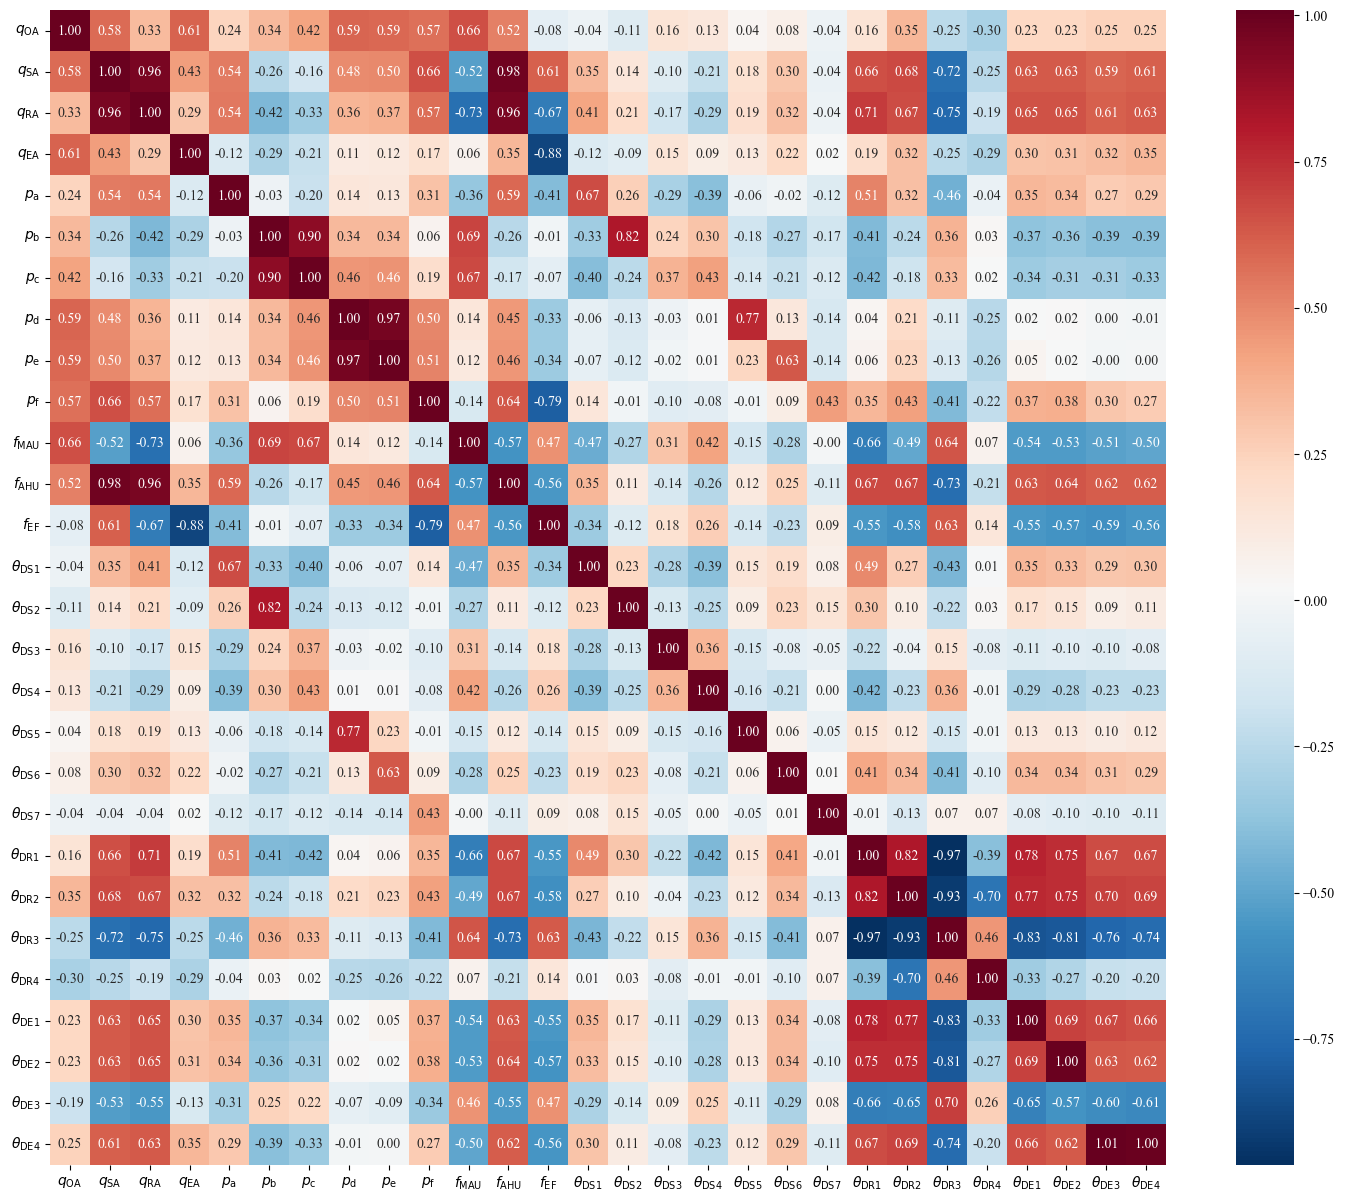

In [8]:
plt.figure(figsize=(18, 15))  # 设置图像的大小
sns.heatmap(_relevant_corr_matrix, annot=True, fmt=".2f", cmap="RdBu_r")
# ------------------------- 修改轴标签 ------------------------ #
plt.gca().set_xticklabels(featName_all_latex, rotation=0)
plt.gca().set_yticklabels(featName_all_latex)
# ------------------------- 设置图标题 ------------------------ #
# plt.title("Correlation Heatmap")
plt.savefig("/workspace/figs/heatmap/heatmap_all.jpg", dpi=600, bbox_inches="tight")
plt.show()

# Tasks' heatmap

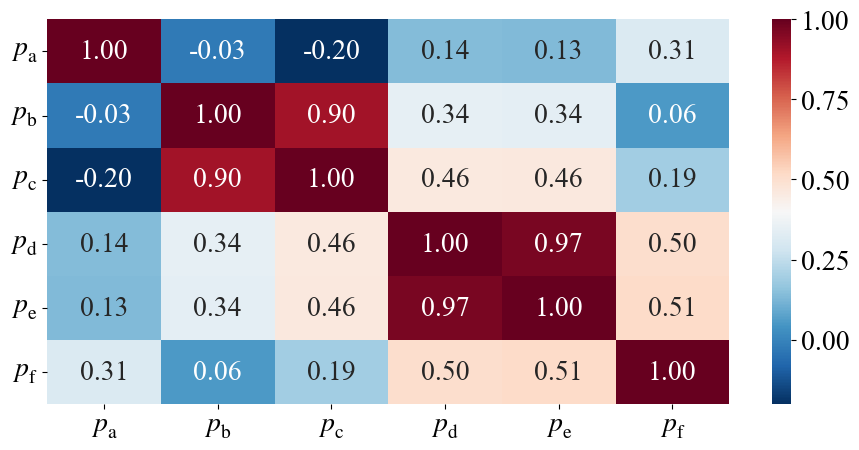

In [27]:
featName_controlled = [
    # "TOT_FRSH_VOL",
    # "TOT_SUPP_VOL",
    # "TOT_RET_VOL",
    # "TOT_EXH_VOL",
    "RM1_PRES",  # 一更
    "RM2_PRES",  # 二更
    "RM6_PRES",  # 洁净走廊
    "RM3_PRES",  # 测试间一
    "RM4_PRES",  # 测试间二
    "RM5_PRES",  # 测试间三
]
featName_controlled_latex = [
    # r"$q_{\mathrm{fresh}}$",
    # r"$q_{\mathrm{supply}}$",
    # r"$q_{\mathrm{return}}$",
    # r"$q_{\mathrm{exhaut}}$",
    r"$\mathit{p}_{\mathrm{a}}$",
    r"$\mathit{p}_{\mathrm{b}}$",
    r"$\mathit{p}_{\mathrm{c}}$",
    r"$\mathit{p}_{\mathrm{d}}$",
    r"$\mathit{p}_{\mathrm{e}}$",
    r"$\mathit{p}_{\mathrm{f}}$",
]
df_all = pd.read_csv("data/rdc_data_cleaned.csv")
_relevant_corr_matrix = df_all.corr().loc[featName_controlled, featName_controlled]

plt.figure(figsize=(11, 5))  # 设置图像的大小
sns.heatmap(_relevant_corr_matrix, annot=True, fmt=".2f", cmap="RdBu_r")
# # ------------------------- 修改轴标签 ------------------------ #
plt.gca().set_xticklabels(featName_controlled_latex, rotation=0)
plt.gca().set_yticklabels(featName_controlled_latex)
# # ------------------------- 设置图标题 ------------------------ #
# plt.title("Correlation Heatmap")
# plt.savefig("figs/heatmap.jpg", dpi=300, bbox_inches="tight")
plt.show()

# DWA vs LDWA

In [ ]:
df_1 = pd.read_csv(
    r"C:\Users\KAI\Desktop\run-NN_mlp-L12_resume_BS128_LR0.001_EP2000_2023-05-28T15-32-41-tag-val_supply_volume_mae.csv"
)
df_2 = pd.read_csv(
    r"C:\Users\KAI\Desktop\run-NN_mlp-L12_BS128_LR0.001_EP1000_2023-05-27T11-33-13-tag-val_supply_volume_mae.csv"
)
df_val = pd.concat([df_1, df_2], ignore_index=True)  # 合并两个 DataFrame
df_val.sort_values(by="Step", inplace=True, ascending=True)

df_1 = pd.read_csv(
    r"C:\Users\KAI\Desktop\run-NN_mlp-L12_resume_BS128_LR0.001_EP2000_2023-05-28T15-32-41-tag-train_supply_volume_mae.csv"
)
df_2 = pd.read_csv(
    r"C:\Users\KAI\Desktop\run-NN_mlp-L12_BS128_LR0.001_EP1000_2023-05-27T11-33-13-tag-val_supply_volume_mae.csv"
)
df_train = pd.concat([df_1, df_2], ignore_index=True)  # 合并两个 DataFrame
df_train.sort_values(by="Step", inplace=True, ascending=True)

loss = {
    "val/pres_mae": df_val["Value"].tolist(),
    "train/pres_mae": df_train["Value"].tolist(),
}
with plt.style.context(["science", "grid", "no-latex"]):
    fig, ax = plt.subplots()
    ax.plot(df_val["Value"].tolist(), label="val/mae")
    ax.plot(df_train["Value"].tolist(), linestyle="-.", label="train/mae")
    plt.title("Total Supply Volume Error")  # 图标题
    ax.legend()  # 图例标题
    ax.set(xlabel="Epoch")  # X 轴标题
    ax.set(ylabel="Volume (CMH)")  # Y 轴标题
    # ax.autoscale(tight=True)
    # ax.set_ylim(top=3) # 设置 Y 刻度最大值

    # save_path = r"C:\Users\KAI\Desktop\TSV_mae.png"
    # fig.savefig(save_path, dpi=300, bbox_inches='tight')